In [1]:
# importation des packages
import matplotlib.pyplot as plt
import numpy as np
import autograd.numpy as au
from autograd import grad, jacobian
import scipy
%matplotlib inline

In [2]:
def func(x): # Fonction Objective (Fonction Booth's)
    return (x[0]+2*x[1]-7)**2 + (2*x[0]+x[1]-5)**2
    
Df = grad(func) # Le Gradient de la fonction objective

In [3]:
# definition de la fonction DFP()

def DFP(Xj, tol, alpha_1, alpha_2):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    Bf = np.eye(len(Xj))
    
    while True:
        Grad = Df(Xj)
        delta = -Bf.dot(Grad) # Sélection du sens de la descente la plus raide
        
        start_point = Xj # Point de départ pour la sélection de la longueur de pas 
        beta = line_search(f=func, myfprime=Df, xk=start_point, 
                           pk=delta, c1=alpha_1, c2=alpha_2)[0] # Sélection de la longueur du pas
        if beta!=None:
            X = Xj+ beta*delta
        if NORM(Df(X)) < tol:
            x1 += [X[0], ]
            x2 += [X[1], ]
            plt.plot(x1, x2, "rx-", ms=5.5) # Tracer les données finales collectées montrant la trajectoire d'optimisation
            plt.show()
            return X, func(X)
        else:
            Dj = X - Xj # See line 16 of the algorithm
            Gj = Df(X) - Grad # See line 17 of the algorithm
            w1 = Dj # See line 18 of the algorithm
            w2 = Bf.dot(Gj) # See line 19 of the algorithm
            w1T = w1.T
            w2T = w2.T
            sigma1 = 1/(w1T.dot(Gj)) # See line 20 of the algorithm
            sigma2 = -1/(w2T.dot(Gj)) # See line 21 of the algorithm
            W1 = np.outer(w1, w1)
            W2 = np.outer(w2, w2)
            Delta = sigma1*W1 + sigma2*W2 # See line 22 of the algorithm
            Bf += Delta # See line 23 of the algorithm
            Xj = X # Mise à jour vers la nouvelle itération
            x1 += [Xj[0], ]
            x2 += [Xj[1], ]  

Text(0, 0.5, '$x_2$ ->')

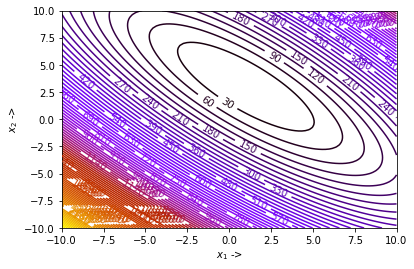

In [4]:
from scipy.optimize import line_search
NORM = np.linalg.norm

# dessinez d'abord le tracé de contour
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
z = np.zeros(([len(x1), len(x2)]))
for i in range(0, len(x1)):
    for j in range(0, len(x2)):
        z[j, i] = func([x1[i], x2[j]])
contours=plt.contour(x1, x2, z, 100, cmap=plt.cm.gnuplot)
plt.clabel(contours, inline=1, fontsize=10)
plt.xlabel("$x_1$ ->")
plt.ylabel("$x_2$ ->")

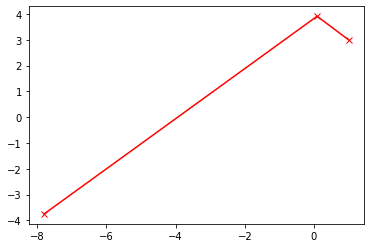

[1. 3.]
1.5777218104420236e-30


In [5]:
x, dfp = DFP(np.array([-7.8, -3.75]), 10**-5, 10**-4, 3.82)
print(x)
print(dfp)